<a href="https://colab.research.google.com/github/jonchung1205/StockPricePredictor/blob/main/StockPricePredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program will implement LSTM to predict closing stock price of a company using past stock price



In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get Stock information
import yfinance as yf

df = yf.download('BNTX', start='2012-01-01', end='2023-05-23')

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-10,16.500000,16.698999,13.010000,14.240000,14.053854,2805800
2019-10-11,15.340000,15.340000,13.500000,13.820000,13.639344,1364300
2019-10-14,13.830000,13.910000,12.525000,12.750000,12.583332,899100
2019-10-15,12.990000,13.000000,12.530000,12.920000,12.751110,484700
2019-10-16,13.200000,13.880000,12.610000,12.940000,12.770847,524200
...,...,...,...,...,...,...
2023-05-16,106.769997,107.320000,105.080002,105.599998,105.599998,487700
2023-05-17,108.040001,108.419998,105.150002,105.150002,105.150002,943400
2023-05-18,105.250000,105.599998,103.949997,104.949997,104.949997,604600


In [ ]:
df.shape

(910, 6)

Text(0, 0.5, 'Close Price USD ($)')

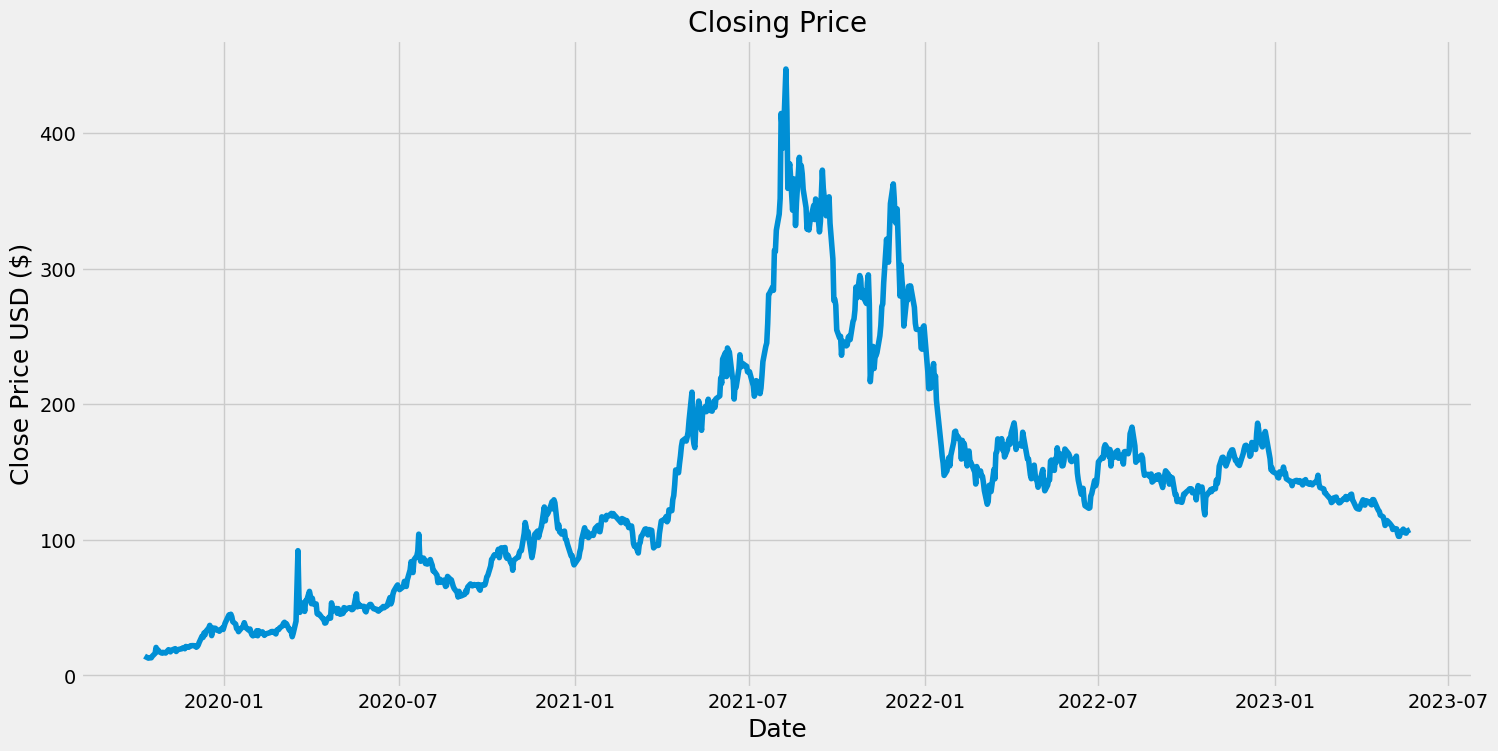

In [ ]:
#Graph the closing prices of the stock

plt.figure (figsize=(16,8))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [ ]:
#make new dataframe with closing price information
data = df.filter(['Close'])

#convert it to numpy array
dataset = data.values
#get the number of rows to train the LSTM model

trained_data_len = math.ceil(len(dataset) * 0.8)

trained_data_len #length is 728



728

In [ ]:
#Scaling the Data (Normalization)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[3.42938624e-03],
       [2.46271328e-03],
       [0.00000000e+00],
       [3.91272491e-04],
       [4.37303387e-04],
       [5.75400464e-04],
       [3.19922737e-03],
       [8.12465613e-03],
       [1.81596372e-02],
       [1.12548317e-02],
       [1.40397722e-02],
       [1.10937202e-02],
       [8.53894078e-03],
       [9.78180789e-03],
       [9.29847361e-03],
       [9.36751885e-03],
       [8.67704005e-03],
       [1.43159620e-02],
       [1.31881776e-02],
       [1.06564147e-02],
       [1.30500827e-02],
       [1.40858053e-02],
       [1.60881965e-02],
       [1.12548317e-02],
       [1.33492890e-02],
       [1.43850116e-02],
       [1.49373955e-02],
       [1.59961347e-02],
       [1.74461419e-02],
       [1.74921750e-02],
       [1.59501016e-02],
       [1.97477438e-02],
       [1.84128149e-02],
       [1.98167934e-02],
       [2.10136230e-02],
       [2.12437841e-02],
       [2.09906109e-02],
       [1.84588479e-02],
       [1.98398099e-02],
       [2.24176016e-02],


In [ ]:
#create training dataset
#create the scaled training

train_data = scaled_data[0:trained_data_len , :]

#Split data into x_train and y_train

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00342939, 0.00246271, 0.        , 0.00039127, 0.0004373 ,
       0.0005754 , 0.00319923, 0.00812466, 0.01815964, 0.01125483,
       0.01403977, 0.01109372, 0.00853894, 0.00978181, 0.00929847,
       0.00936752, 0.00867704, 0.01431596, 0.01318818, 0.01065641,
       0.01305008, 0.01408581, 0.0160882 , 0.01125483, 0.01334929,
       0.01438501, 0.0149374 , 0.01599613, 0.01744614, 0.01749217,
       0.0159501 , 0.01974774, 0.01841281, 0.01981679, 0.02101362,
       0.02124378, 0.02099061, 0.01845885, 0.01983981, 0.0224176 ,
       0.02674462, 0.03740103, 0.03509943, 0.04269471, 0.03933438,
       0.04534156, 0.05121064, 0.0556067 , 0.05121064, 0.03818358,
       0.0511416 , 0.05058921, 0.04768919, 0.04706776, 0.04564077,
       0.0510035 , 0.04863285, 0.05926625, 0.06283373, 0.07325999])]
[0.07040600114869375]



In [ ]:
#convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#Reshape Data since x_train is 2 dimensional and LSTM takes in 3 dimensions

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape



(668, 60, 1)

In [ ]:

#Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile model
model.compile(optimizer='adam', loss = 'mean_squared_error')


In [ ]:
#train the model using fit
model.fit(x_train, y_train, batch_size=1, epochs=1)

668/668 [==============================] - 26s 32ms/step - loss: 0.0050


In [ ]:
#Create Testing Data set
#create new array containing scaled values from index 669 to 2003

test_data = scaled_data[trained_data_len - 60: , :]

#Create the data sets x_test and y_test
x_test = []
y_test =  dataset[trained_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
#convert data to numpy array
x_test= np.array(x_test)


In [ ]:
#reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


6/6 [==============================] - 1s 16ms/step


In [ ]:
#evaluate the model by using RMSE

rmse = np.sqrt(np.mean (predictions - y_test) **2)
rmse

2.4476829780327094

<ipython-input-64-ca904c86f10f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


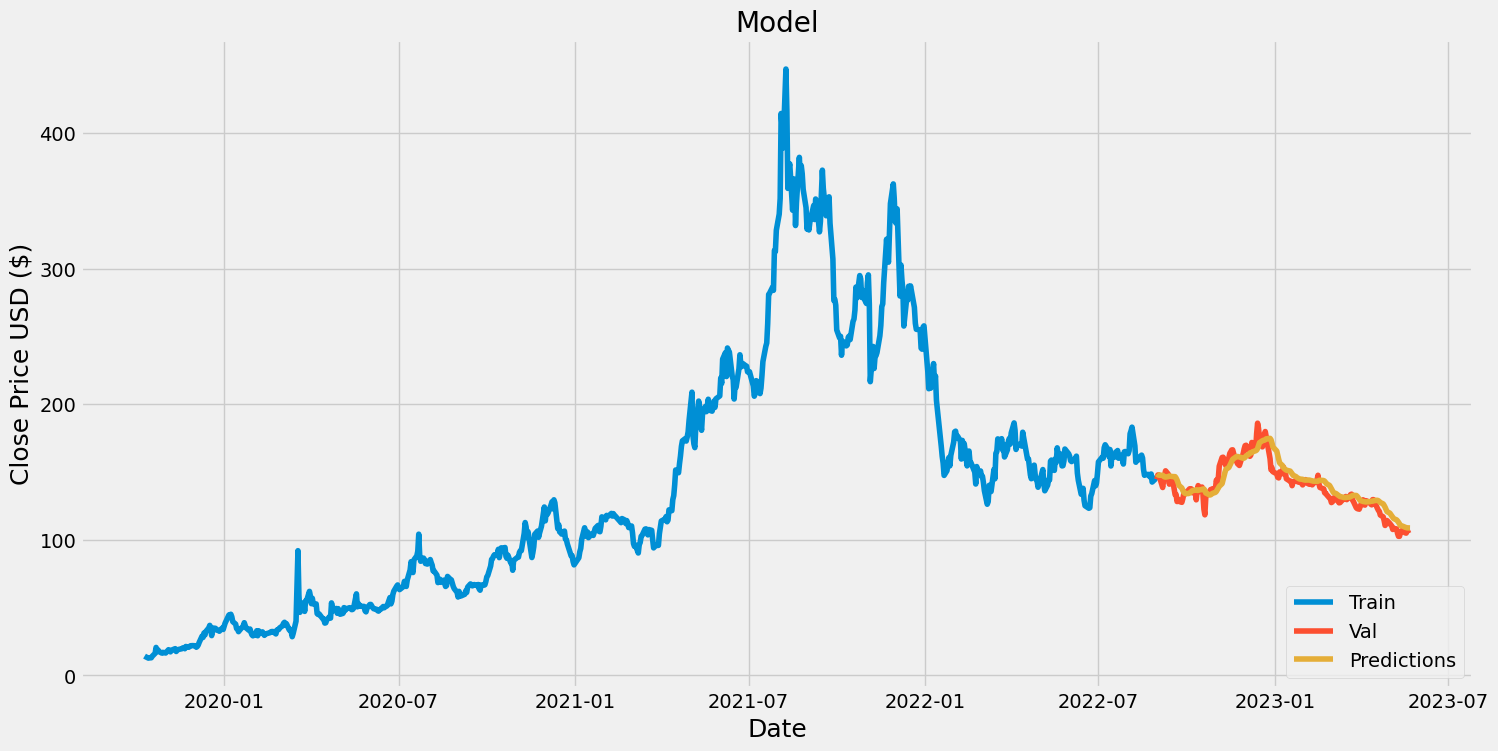

In [ ]:
#Plot Data
train = data[:trained_data_len]
validation = data[trained_data_len:]
validation['Predictions'] = predictions

#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18 )
plt.plot(train['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()


In [ ]:
#Show the valid and predicted prices

validation

,Close,Predictions
Date,,
2022-08-31,144.639999,148.628662
2022-09-01,147.809998,147.966995
2022-09-02,147.899994,147.671921
2022-09-06,138.580002,147.603607
2022-09-07,144.110001,146.901566
...,...,...
2023-05-16,105.599998,109.529251
2023-05-17,105.150002,109.257927
2023-05-18,104.949997,109.025269


In [ ]:
 #Get the quote

quote = yf.download('BNTX', start='2012-01-01', end='2023-05-23')

#create new df
new_df = quote.filter(['Close'])

#Get the last 60 day close price values and convert into array
last_60 = new_df[-60:].values
#scale the data
last_60_scaled = scaler.transform(last_60)
#create empty list
X_test = []
#append the last 60 to the list

X_test.append(last_60_scaled)
X_test = np.array(X_test)
#Reshape
X_test = np.reshape(X_test,  (X_test.shape[0], X_test.shape[1], 1))
#Get predicted scaled price
pred_price = model.predict(X_test)

#Undo Scaling
pred_price = scaler.inverse_transform(pred_price)

#print the predicted price
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 27ms/step
[[108.88594]]
